In [330]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import gc
import neurokit2 as nk2
import sleepecg
import biosppy
import wfdb
import wfdb.processing

In [609]:
path_NORM = r'./Class01/Not Arrhythmia/NORMAL.npy'
path_ARRHYTHMIA = r'./Class01/Arrhythmia/ARRHYTHMIA.npy'


In [610]:
# Load data
NORM = np.load(path_NORM)
ARRH = np.load(path_ARRHYTHMIA)


print(NORM.shape)
print(ARRH.shape)


(13111, 5000)
(13804, 5000)


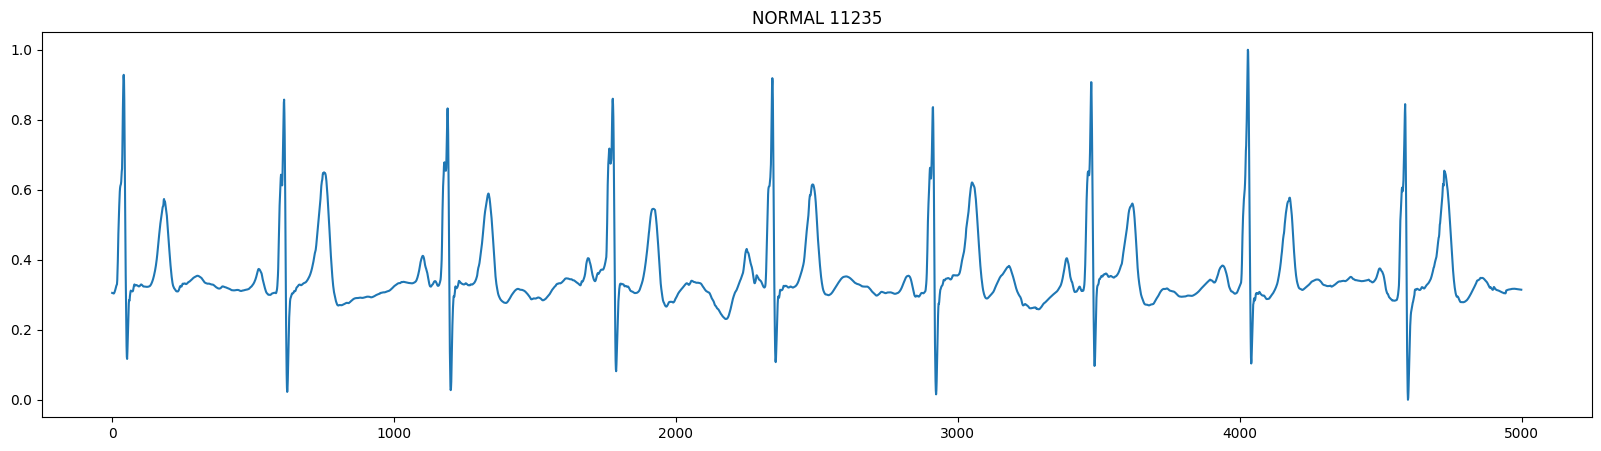

In [622]:
plt.figure(figsize=(20, 5))
k = random.randint(0, NORM.shape[0])
plt.plot(NORM[k])
plt.title(f'NORMAL {k}')
plt.show()
del k

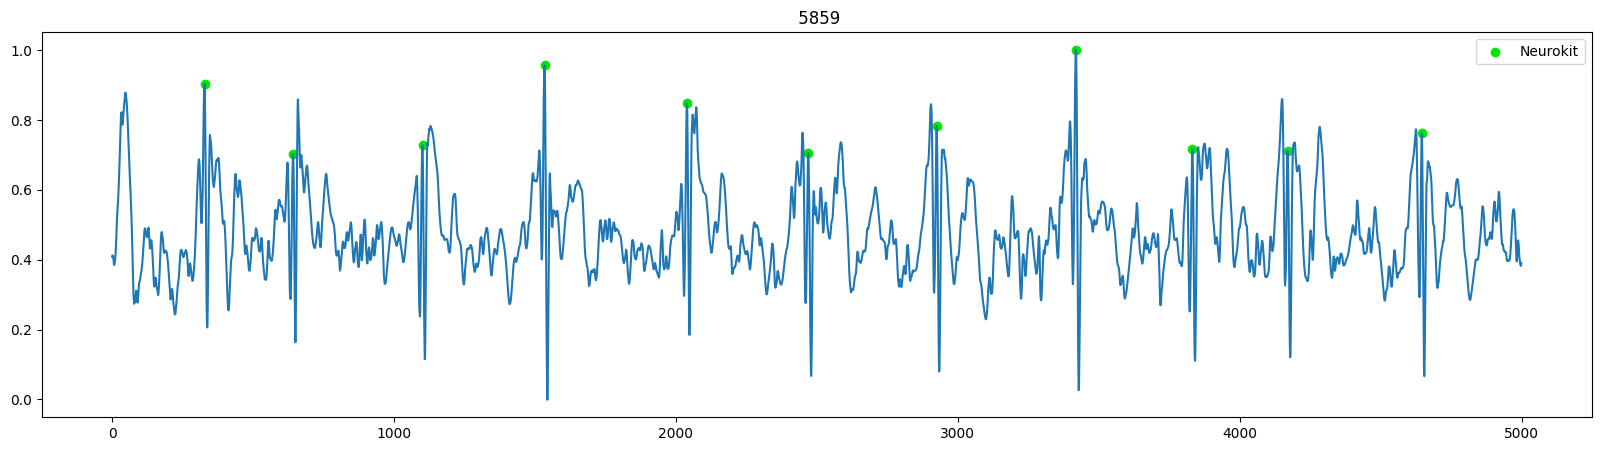

In [623]:
# R peak detection
k = random.randint(0, ARRH.shape[0])
s = ARRH[k]
_, results = nk2.ecg_peaks(s, sampling_rate=500)
rpeaks1 = results["ECG_R_Peaks"]

plt.figure(figsize=(20, 5))
plt.title(f' {k}')

plt.plot(s)
plt.scatter(rpeaks1, s[rpeaks1], c='#00e600', label='Neurokit')
plt.legend()

plt.show()
k = random.randint(0, AFIB.shape[0])
# del k, s, results, _

In [624]:
print(rpeaks1)

[ 328  642 1101 1534 2039 2470 2925 3419 3832 4170 4646]


<class 'pandas.core.frame.DataFrame'>
Index(['Signal', 'Index', 'Label'], dtype='object')


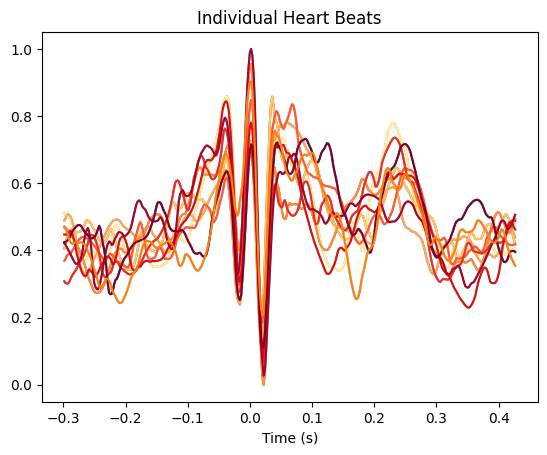

In [625]:
segmented_beats = nk2.ecg_segment(s, rpeaks1, sampling_rate=500, show=True)
# plt.plot(segmented_beats)
print(type(segmented_beats['1']))

sdf = segmented_beats['1']
print(sdf.keys())
# print(sdf['Signal'])
plt.plot(sdf['Signal'])


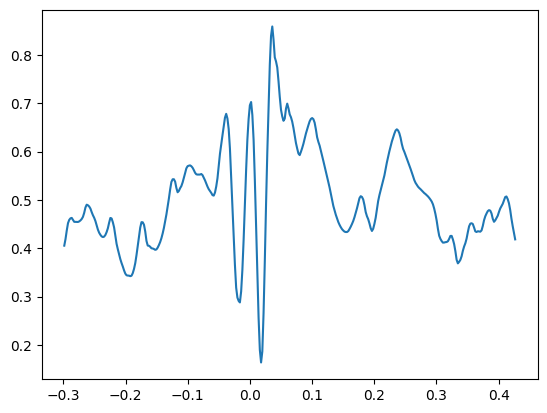

In [626]:
# print(sdf['Index'],sdf['Label'])
plt.plot(segmented_beats['2']['Signal'])

In [627]:
int(list(segmented_beats.keys())[-1])
l = int(list(segmented_beats.keys())[-1])
print(l,list(segmented_beats.keys()))

11 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>
11 <class 'int'>


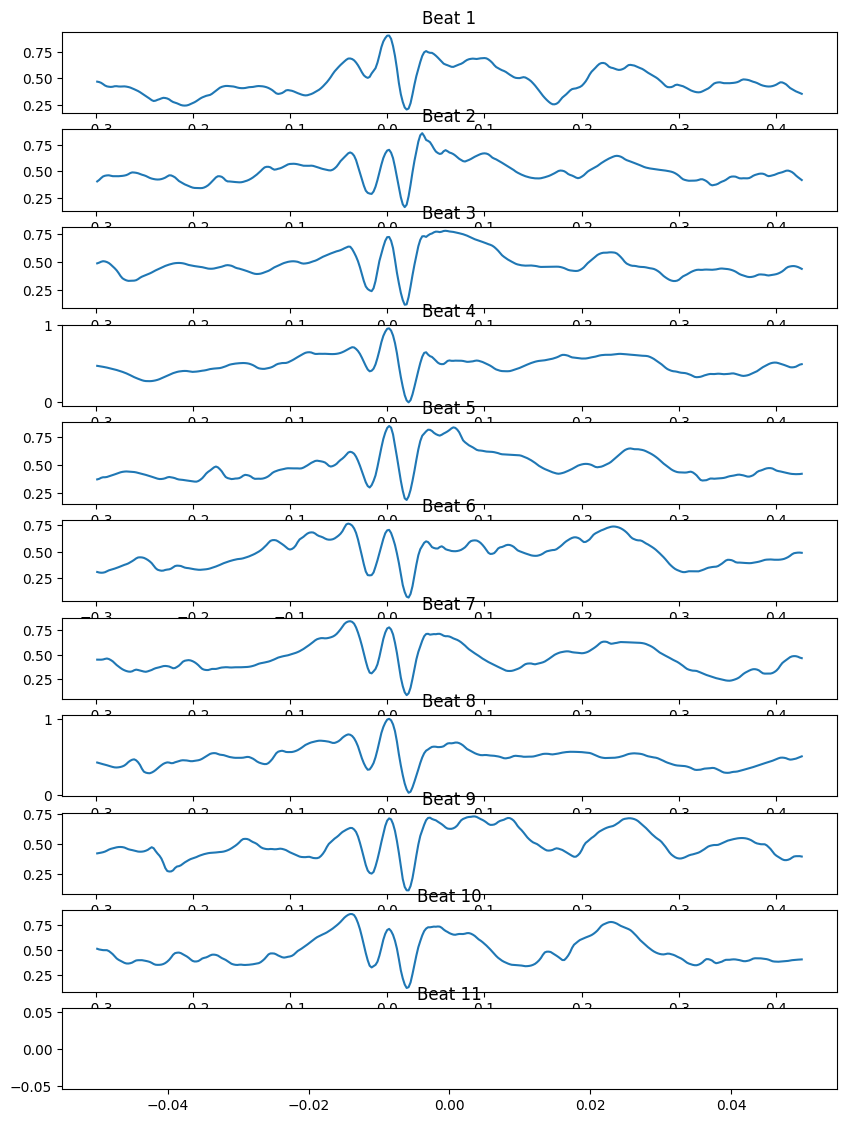

In [628]:
segmented_beats = nk2.ecg_segment(s, rpeaks1, sampling_rate=500, show=False)
plt.figure(figsize=(10, 15))
for i in range(1,l+1):
    plt.subplot(l+1, 1, i+1)
    print(i,type(int(i)))
    # i+=1
    plt.title(f'Beat {i}')
    plt.plot(segmented_beats[str(i)]['Signal'])
plt.show()

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

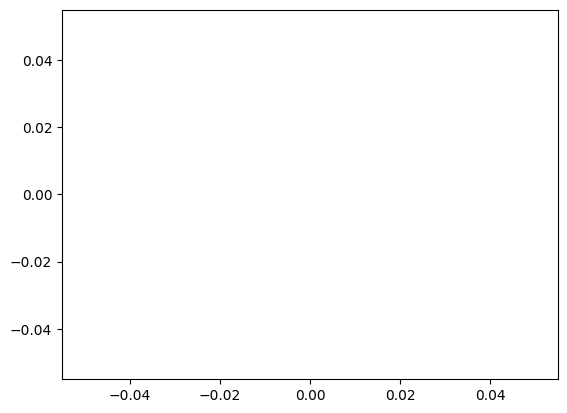

In [629]:
print(segmented_beats['11']['Signal'].to_numpy())
plt.plot(segmented_beats['11']['Signal'].to_numpy())

In [ ]:
# segment the heartbeats for all the classes
# discard the first and last beats
# save the segmented beats in a folder
